# Elon-Musk Tweets

In [1]:
#Import Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset
TM=pd.read_csv('/content/Elon_musk.csv',encoding='unicode_escape')

In [3]:
TM.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


# Performing EDA

In [4]:
TM.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [5]:
TM.duplicated().sum()

0

In [6]:
TM=TM.drop(columns=('Unnamed: 0'),axis=1)

In [7]:
TM.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Preprocessing

**Step 1 - Remove space and symbol**

In [8]:
TM.Text=TM.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [9]:
TM.head()

,Text
0,kunalb Im an alien
1,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,joerogan Spotify Great interview
3,gtera Doge is underestimated
4,teslacn Congratulations Tesla China for amazin...


**Step 2 - Make text to lower**

In [10]:
TM.Text=TM.Text.apply(lambda x: x.lower())

In [11]:
TM.head()

,Text
0,kunalb im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,gtera doge is underestimated
4,teslacn congratulations tesla china for amazin...


In [12]:
TM.shape

(1999, 1)

**Step 3- Splitting the words from line.**





In [13]:
TM.Text=TM.Text.apply(lambda x: x.split())

In [14]:
TM

,Text
0,"[kunalb, im, an, alien]"
1,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, is, underestimated]"
4,"[teslacn, congratulations, tesla, china, for, ..."
...,...
1994,"[flcnhvy, true, it, sounds, so, surreal, but, ..."
1995,"[ppathole, make, sure, to, read, ur, terms, am..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, and, dumber, is, ufuf]"


**Step 4- Removing stop words.**

In [15]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
TM.Text=TM.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [18]:
TM

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, tracing, cyberpunk, hdr, ne..."
2,"[joerogan, spotify, great, interview]"
3,"[gtera, doge, underestimated]"
4,"[teslacn, congratulations, tesla, china, amazi..."
...,...
1994,"[flcnhvy, true, sounds, surreal, negative, pro..."
1995,"[ppathole, make, sure, read, ur, terms, amp, c..."
1996,"[teslagong, ppathole, samwise, gamgee]"
1997,"[ppathole, altho, dumb, dumber, ufuf]"


**Step 5- Stemming.**

In [19]:
PS = PorterStemmer()  
TM.Text=TM.Text.apply(lambda x: [PS.stem(word) for word in x])

In [20]:
TM

,Text
0,"[kunalb, im, alien]"
1,"[idaacarmack, ray, trace, cyberpunk, hdr, next..."
2,"[joerogan, spotifi, great, interview]"
3,"[gtera, doge, underestim]"
4,"[teslacn, congratul, tesla, china, amaz, execu..."
...,...
1994,"[flcnhvi, true, sound, surreal, neg, propagand..."
1995,"[ppathol, make, sure, read, ur, term, amp, con..."
1996,"[teslagong, ppathol, samwis, gamge]"
1997,"[ppathol, altho, dumb, dumber, ufuf]"


**Step 6- Rejoining**

In [21]:
TM.Text=TM.Text.apply(lambda x: " ".join(x))

In [22]:
TM

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut last...
...,...
1994,flcnhvi true sound surreal neg propaganda stil...
1995,ppathol make sure read ur term amp condit clic...
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


In [23]:
pip install -U textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Sentiment Analysis

In [24]:
from textblob import TextBlob
TM['sentiment'] = TM['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
TM[['Text','sentiment']].head()

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


<Axes: xlabel='sentiment', ylabel='Density'>

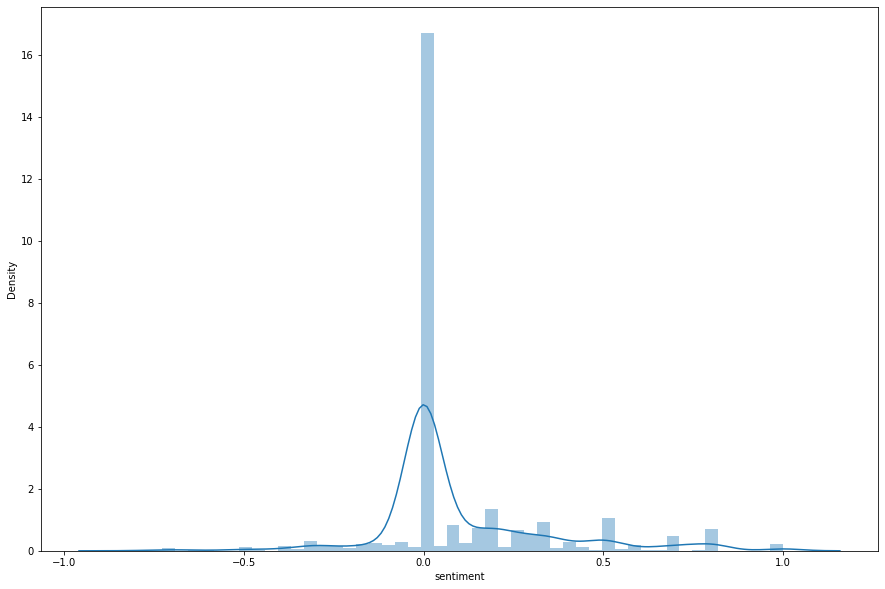

In [25]:
plt.figure(figsize=(15,10))
sns.distplot(TM['sentiment'])

**As we can see this distribution plot shows that for large no.of text in our dataset we got sentiment score as 0, which means that the text has a neutral sentiment and contain very less negative sentiment and some amount of positive sentiments.**

In [26]:
TM['index']=range(0,len(TM))
TM

,Text,sentiment,index
0,kunalb im alien,-0.250000,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,1
2,joerogan spotifi great interview,0.800000,2
3,gtera doge underestim,0.000000,3
4,teslacn congratul tesla china amaz execut last...,0.000000,4
...,...,...,...
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,1994
1995,ppathol make sure read ur term amp condit clic...,0.500000,1995
1996,teslagong ppathol samwis gamge,0.000000,1996
1997,ppathol altho dumb dumber ufuf,-0.375000,1997


<Axes: xlabel='index', ylabel='sentiment'>

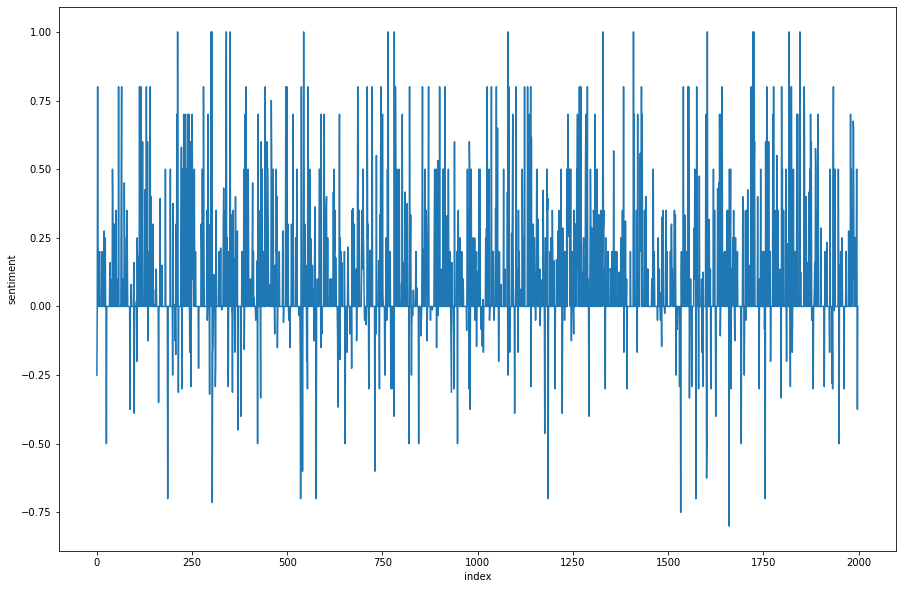

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment',x='index',data=TM)

**In this line plot we placed text(using index) on X-axis against its sentiment values that we have computed.**

**This plot also shows that:**


**1.   75% of text got sentiment score as 0**

**2.   15% of text got sentiment score as positive**

**3.   10% of text got sentiment score as negative**






In [28]:
TM.head()

,Text,sentiment,index
0,kunalb im alien,-0.25,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00,1
2,joerogan spotifi great interview,0.80,2
3,gtera doge underestim,0.00,3
4,teslacn congratul tesla china amaz execut last...,0.00,4


In [29]:
TM['word_count']=TM['Text'].str.split().apply(len)
TM['word_count']

0        3
1        7
2        4
3        3
4       10
        ..
1994    12
1995    10
1996     4
1997     5
1998     3
Name: word_count, Length: 1999, dtype: int64

<Axes: title={'center': 'Sent sentiment to sent word count'}, xlabel='word_count', ylabel='sentiment'>

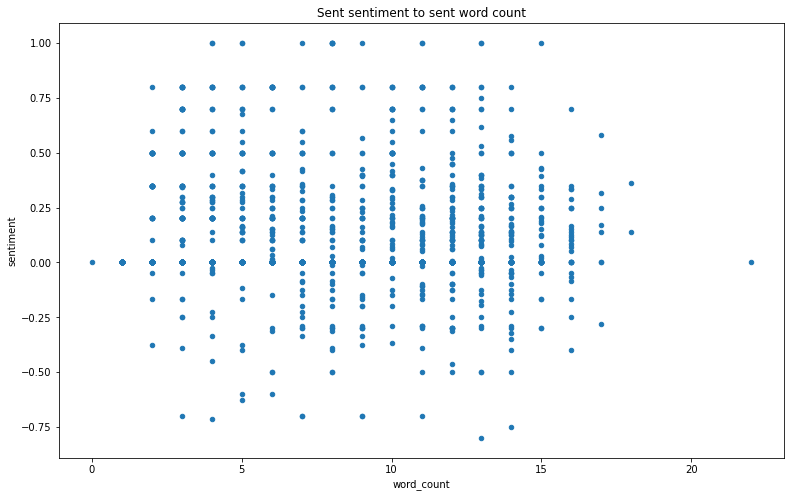

In [30]:
TM.plot.scatter(x='word_count',y='sentiment',figsize=(13,8),title='Sent sentiment to sent word count')

**This scatter plot shows how many words are there in the sentence agianst their sentiment scores.**

**In above steps we've performed sentiment analysis without considering affinity scores,which assumes that each positive or negative word contributes equally to the sentiment of the text, regardless of its context or intensity.**


**Now we are goint to perform sentiment analysis by taking affinity scores into account, where it considers the specific emotional value of each word in the text. Words that are strongly positive or strongly negative are assigned higher scores than those that are more neutral.**

# Affinity Score



In [31]:
affin=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [32]:
affin_scores=affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [33]:
! pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import spacy
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affin_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [35]:
calculate_sentiment(text='admire')

3

In [36]:
TM['aff_scr']=TM['Text'].apply(calculate_sentiment)
TM['aff_scr']

0       0
1       0
2       3
3       0
4       0
       ..
1994   -2
1995    1
1996    0
1997   -6
1998    2
Name: aff_scr, Length: 1999, dtype: int64

In [37]:
TM.head()

,Text,sentiment,index,word_count,aff_scr
0,kunalb im alien,-0.25,0,3,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00,1,7,0
2,joerogan spotifi great interview,0.80,2,4,3
3,gtera doge underestim,0.00,3,3,0
4,teslacn congratul tesla china amaz execut last...,0.00,4,10,0


In [38]:
TM.sort_values(by='aff_scr')

,Text,sentiment,index,word_count,aff_scr
186,naval tyranni also road hell mostli pave bad i...,-0.700000,186,9,-7
1997,ppathol altho dumb dumber ufuf,-0.375000,1997,5,-6
1717,neuroskept dont fire go sever second minut wit...,0.000000,1717,13,-6
1533,ppathol earli investor part tesla wrong bs pus...,-0.750000,1533,14,-5
1015,ennnafnlau sketchi edit tesla wiki whitewash e...,-0.166667,1015,12,-5
...,...,...,...,...,...
468,picotjohn cyberpunkgam good great game imo imp...,0.150000,468,15,8
1357,great trip germani support govern amp peopl su...,0.566667,1357,9,8
1786,flcnhvi yourfavga ajtourvil realli want great ...,0.550000,1786,10,8
1172,thank tesla team great work deliveri new owner...,0.423232,1172,15,8


In [39]:
TM['aff_scr'].describe()

count    1999.000000
mean        0.529265
std         1.569230
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: aff_scr, dtype: float64

In [40]:
# Negative sentiment
TM[TM['aff_scr']<=0]

,Text,sentiment,index,word_count,aff_scr
0,kunalb im alien,-0.250000,0,3,0
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.000000,1,7,0
3,gtera doge underestim,0.000000,3,3,0
4,teslacn congratul tesla china amaz execut last...,0.000000,4,10,0
5,happi new year ox httpstcowfkmyuoj,0.136364,5,5,0
...,...,...,...,...,...
1992,ai symbiosi u wait,0.000000,1992,4,0
1993,vistacruis flcnhvi there,0.000000,1993,3,0
1994,flcnhvi true sound surreal neg propaganda stil...,0.186667,1994,12,-2
1996,teslagong ppathol samwis gamge,0.000000,1996,4,0


In [41]:
# Positive sentiment
TM[TM['aff_scr']>0]

,Text,sentiment,index,word_count,aff_scr
2,joerogan spotifi great interview,0.800,2,4,3
7,owenspark flcnhvi anonyx haha thank,0.200,7,5,5
9,entertain outcom like,0.000,9,3,2
16,freewalletorg thank fix,0.000,16,3,2
19,true power haha httpstcofcuhqsdo,0.275,19,4,3
...,...,...,...,...,...
1986,best use term full stack,0.675,1986,5,3
1987,ppathol ihearttesla sure great amp terrifi eve...,0.650,1987,12,3
1989,buzzindelhi sorri hope soon,0.000,1989,4,2
1995,ppathol make sure read ur term amp condit clic...,0.500,1995,10,1


**Here we are agian plotting distribution, line, scatter plots but this time instead of sentiment values we are using affinity score.**

**If we compare these plots with the previous ones we can see slightly changes in that.**

<Axes: xlabel='aff_scr', ylabel='Density'>

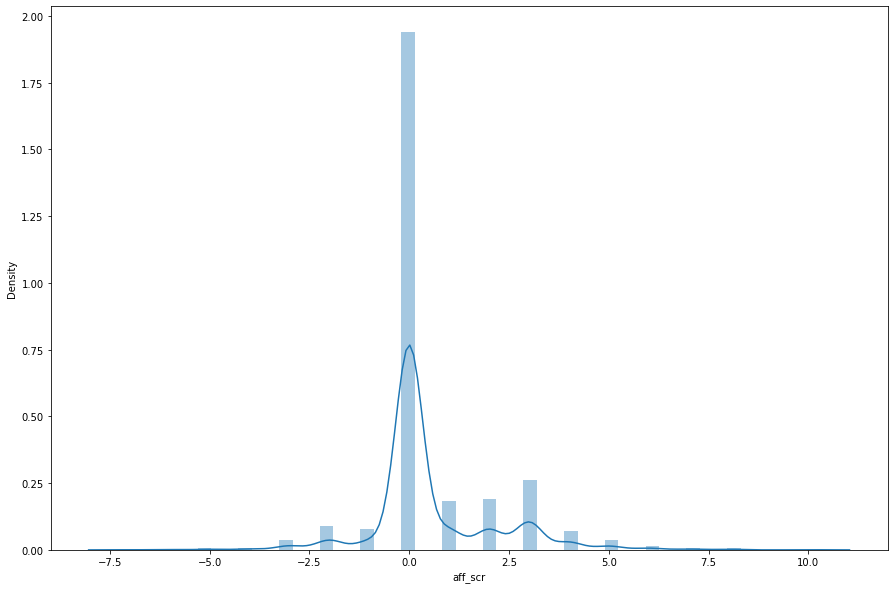

In [42]:
plt.figure(figsize=(15,10))
sns.distplot(TM['aff_scr'])

<Axes: xlabel='index', ylabel='aff_scr'>

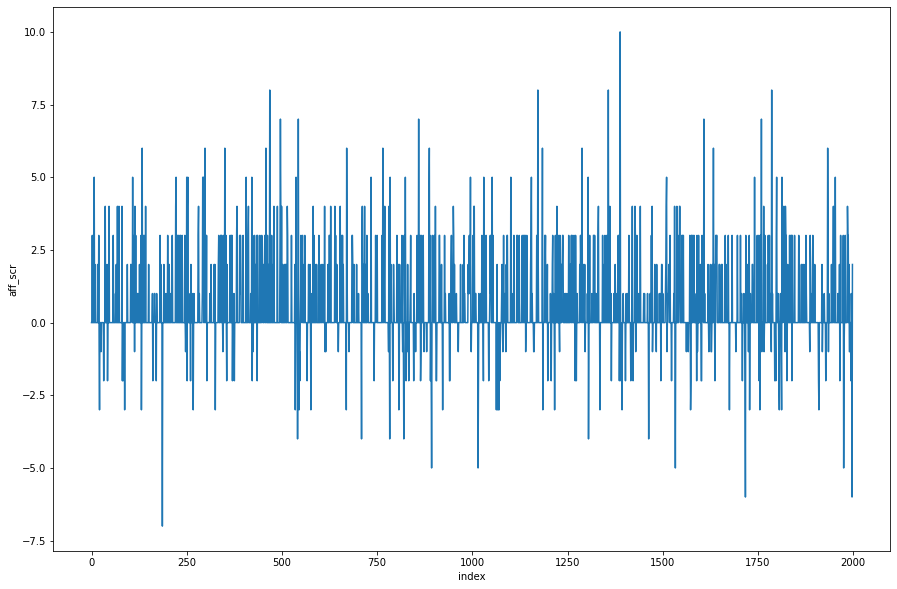

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot(y='aff_scr',x='index',data=TM)

<Axes: title={'center': 'affine score sent to word count'}, xlabel='word_count', ylabel='aff_scr'>

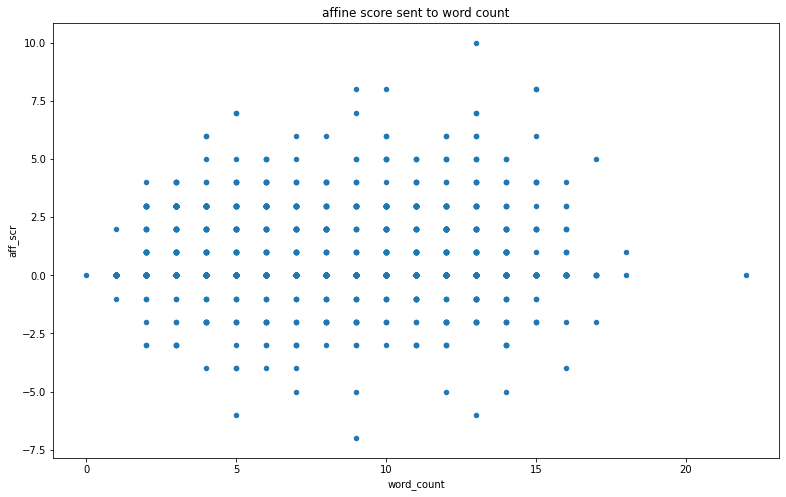

In [44]:
TM.plot.scatter(x='word_count',y='aff_scr',figsize=(13,8),title='affine score sent to word count')

# Problem statement - 2

**1 Extract reviews of any product from ecommerce website like amazon.**


**2 Perform emotion mining.**

In [45]:
#Importing libraries
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

**Here we took random review link of one plus airpod, we're going to perform emotion mining on that.**


**First we will compute sentiments only, Second we will use affinity method to see if changes occured or not.**

In [46]:
link='https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar'

In [47]:
# Getting reviews of first five pages
review_list=[]
for k in range(0,7):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())

https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar&pageNumber=0
https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar&pageNumber=1
https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar&pageNumber=2
https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar&pageNumber=3
https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rvwer?ie=UTF8&filterByStar=five_star&reviewerType=avp_only_reviews&pageNumber=1#reviews-filter-bar&pageNumber=4
https://www.amazon.in/product-reviews/B0BRSLJCY2/ref=cm_cr_arp_d_viewopt_rv

In [48]:
review_list

["The Oneplus Buds Pro 2 are a solid choice for true wireless earbuds.👍🏼PRO'S -- The sound quality is impressive, with rich bass and clear highs.- The active noise cancellation is effective and makes a noticeable difference in blocking out external noise.- The touch controls are intuitive and easy to use.- Mic is decent quality- The battery life is also impressive, with up to 7 hours of listening time on a single charge.- Dual-Device Connectivity👎🏼CONS- However, the FIT may not be comfortable for everyone, and some may experience discomfort after prolonged use.- Many Oneplus Buds Pro 1 users were claiming that the battery gives up after one year , hope that Oneplus looked into that issue- The pause/ play gesture is unresponsive noticable amount of times when using with a tabletCONCLUSION Overall, the Oneplus Buds Pro 2 are a great option for those looking for high-quality sound and effective noise cancellation in a sleek and stylish design.8/10",
 "These are the best purchased electron

In [49]:
len(review_list)

40

In [50]:
RL=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 800)
RL

,Reviews
0,"The Oneplus Buds Pro 2 are a solid choice for true wireless earbuds.👍🏼PRO'S -- The sound quality is impressive, with rich bass and clear highs.- The active noise cancellation is effective and makes a noticeable difference in blocking out external noise.- The touch controls are intuitive and easy to use.- Mic is decent quality- The battery life is also impressive, with up to 7 hours of listening time on a single charge.- Dual-Device Connectivity👎🏼CONS- However, the FIT may not be comfortable for everyone, and some may experience discomfort after prolonged use.- Many Oneplus Buds Pro 1 users were claiming that the battery gives up after one year , hope that Oneplus looked into that issue- The pause/ play gesture is unresponsive noticable amount of times when using with a tabletCONCLUSION..."
1,"These are the best purchased electronics I bought for myself. They can overpower other brands without a hurdle.Features they support (And I love) :1. BassWave : Adjust your bass as you like.2. Dual Connection Support : Connect to 2 devices at same time.3. Ear Canal Scanning : Some features uses ear canal structure to optimise sound, noise cancelling and earbuds fit .4. Quick Charge : Within few minutes you have battery to go for couple of days.5. Responsive Haptic : These earbuds response with sound and vibration to let you know that pressed sensor has been triggered.6. Software : If you are OnePlus user they have very easy to understand and work UI for these earbuds. Where you can access all of its features. If you are not a OnePlus user you can use a 'HeyMelody' application.Verdict :..."
2,"Started using this with Samsung galaxy s21 ultra and following are my views:Pros:- Matte finish cover and not glossy- Excellent sound quality and amazing bass- Excellent call quality through Teams, Whatsapp without any issues- ANC mode is OK as it was missing in OnePlus buds pro- Dual pairing at a time say with mobile and laptop- Quick Bluetooth connect- Easy fit in ears and comfy. Best part is you can use either of buds on right ear easily- Best buy if looking at budget of 10-11K and never have to think for Air pods pro believe me...Cons: As of now yet to find"
3,The media could not be loaded.\n \n\n\n\n I have bought this TWS Bluetooth after a long research and I found it worth buying. I tried realme TWS buds but this one is far better than any other device. Bass and sound quality is amazing. Connectivity is quick. Battery back up is nice. I have bought silicon cover bcoz built quality is not that great. Case is very delicate.
4,"Perfect earbuds for a music lover, bass, treble , highs and lows are too perfect and ANC works awesome as per noice it cancels noice perfectly 😍Spatial audio only works for one plus 11 and for remaining one plus phone will get Spatial audio feature after we get a major updateFinally, best earbuds you can get , the best experience you can get from these earbuds"
5,"Awesome experience, the Hans Zimmer spatial audio is exquisite 👍 . Some Social Media Influencers are telling the old buds pro bass is better than current one.Actually it's not like that if we edit the blootooth developer option and change the Blootooth Audio Codec from AAC to SBC in the phone and customise the options and hey melody application we get the immense performance and experience. Really Loved it ❤️"
6,From my POV It's the best earbuds I've used under 15000. Comparing it with Samsung galaxy buds 2 pro it has much puncy base. If you're a basehead then you must go for it.
7,Wow..Really OnePlus did a great job here..very light weight sometimes I don't feel.that iam wearing a buds..Arbor green colour is good with matte finish..Bass is top notch especially while you are watching movies in Netflix/ Hotstar with Dolby Atmos...Spatial head tracking sound..lots of EQ options in Bluetooth functions itself..so no need to bother about any Separate app..ANC is not that much good compared to Apple buds and Samsung buds..but this also won't let you down wh

# Preprocessing

**Step 1 - Remove space and symbol**

In [51]:
# Define function to remove symbols from a text column
def remove_symbols(text):
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

# Clean text column and create new column with cleaned data
RL['Reviews'] = RL['Reviews'].apply(remove_symbols)

In [52]:
RL.head()

,Reviews
0,The Oneplus Buds Pro 2 are a solid choice for true wireless earbudsPROS The sound quality is impressive with rich bass and clear highs The active noise cancellation is effective and makes a noticeable difference in blocking out external noise The touch controls are intuitive and easy to use Mic is decent quality The battery life is also impressive with up to 7 hours of listening time on a single charge DualDevice ConnectivityCONS However the FIT may not be comfortable for everyone and some may experience discomfort after prolonged use Many Oneplus Buds Pro 1 users were claiming that the battery gives up after one year hope that Oneplus looked into that issue The pause play gesture is unresponsive noticable amount of times when using with a tabletCONCLUSION Overall the Oneplus Buds Pr...
1,These are the best purchased electronics I bought for myself They can overpower other brands without a hurdleFeatures they support And I love 1 BassWave Adjust your bass as you like2 Dual Connection Support Connect to 2 devices at same time3 Ear Canal Scanning Some features uses ear canal structure to optimise sound noise cancelling and earbuds fit 4 Quick Charge Within few minutes you have battery to go for couple of days5 Responsive Haptic These earbuds response with sound and vibration to let you know that pressed sensor has been triggered6 Software If you are OnePlus user they have very easy to understand and work UI for these earbuds Where you can access all of its features If you are not a OnePlus user you can use a HeyMelody applicationVerdict If your budget is aroud 10k ...
2,Started using this with Samsung galaxy s21 ultra and following are my viewsPros Matte finish cover and not glossy Excellent sound quality and amazing bass Excellent call quality through Teams Whatsapp without any issues ANC mode is OK as it was missing in OnePlus buds pro Dual pairing at a time say with mobile and laptop Quick Bluetooth connect Easy fit in ears and comfy Best part is you can use either of buds on right ear easily Best buy if looking at budget of 1011K and never have to think for Air pods pro believe meCons As of now yet to find
3,The media could not be loaded\n \n\n\n\n I have bought this TWS Bluetooth after a long research and I found it worth buying I tried realme TWS buds but this one is far better than any other device Bass and sound quality is amazing Connectivity is quick Battery back up is nice I have bought silicon cover bcoz built quality is not that great Case is very delicate
4,Perfect earbuds for a music lover bass treble highs and lows are too perfect and ANC works awesome as per noice it cancels noice perfectly Spatial audio only works for one plus 11 and for remaining one plus phone will get Spatial audio feature after we get a major updateFinally best earbuds you can get the best experience you can get from these earbuds


**Step 2 - Removing Stop words.**

In [53]:
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
PS1=PorterStemmer()

In [56]:
def rvpreprocess(x):
         x=re.sub('[^a-zA-Z ]', "", x)
         x=x.lower()
         x=x.split()  
         x=[word  for word in x if word not in set(stopwords.words('english'))]  
         x=[PS1.stem(word) for word in x] 
         x=" ".join(x)
         return x

In [57]:
RL["Reviews"]=RL["Reviews"].apply(rvpreprocess)

In [58]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


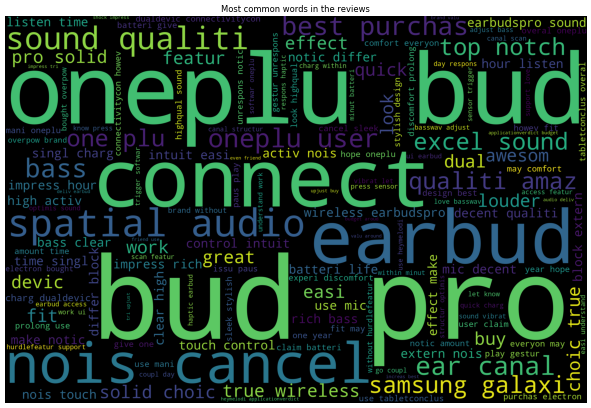

In [59]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=3000,max_words=150, background_color='black')
wordcloud = wordcloud.generate(' '.join(RL['Reviews'].tolist()))
plt.figure(figsize=(15,15),dpi=50)
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

**Here we have created Wordcloud with some most commonly appeared words in the reviews.**

# Sentiment Analysis

In [60]:
from textblob import TextBlob
RL['sentiment_score'] = RL['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
RL[['Reviews','sentiment_score']].head()

,Reviews,sentiment_score
0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,0.291806
1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,0.417593
2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,0.471131
3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,0.283333
4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,0.509062


In [61]:
# Defining function to assign sentiment category based on sentiment_score
# Score Range -0.5 to 0.5 is considered as neutral
def sentiment_category(score1):
    if(score1 > 0.5):
        return 'Positive'
    elif(score1 < -0.5):
        return 'Negative'
    else:
        return 'Neutral'

In [62]:
RL['sentiment'] = RL['sentiment_score'].apply(lambda x:sentiment_category(x))

In [63]:
RL.head()

,Reviews,sentiment_score,sentiment
0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,0.291806,Neutral
1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,0.417593,Neutral
2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,0.471131,Neutral
3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,0.283333,Neutral
4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,0.509062,Positive


In [64]:
RL['index']=range(0,len(RL))
RL

,Reviews,sentiment_score,sentiment,index
0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,0.291806,Neutral,0
1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,0.417593,Neutral,1
2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,0.471131,Neutral,2
3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,0.283333,Neutral,3
4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,0.509062,Positive,4
5,awesom experi han zimmer spatial audio exquisit social media influenc tell old bud pro bass better current oneactu like edit blootooth develop option chang blootooth audio codec aac sbc phone customis option hey melodi applic get immens perform experi realli love,0.163889,Neutral,5
6,pov best earbud ive use compar samsung galaxi bud pro much punci base your basehead must go,0.133333,Neutral,6
7,wowreal oneplu great job hereveri light weight sometim dont feelthat iam wear budsarbor green colour good matt finishbass top notch especi watch movi netflix hotstar dolbi atmosspati head track soundlot eq option bluetooth function itselfso need bother separ appanc much good compar appl bud samsung budsbut also wont let come anc ambient soundoveral good bud price rangearbor green somehow attract sexi,0.425000,Neutral,7
8,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,-0.400000,Neutral,8
9,best purchas sound bass qualiti top notch louderloud louder earbud louder louder superior sound support lhdc codec stream basstrebl mid excel got lot featur like spatial audio hear id customiz nois cancel excel sound customizabilityoveral must buy oneplu phone,0.406250,Neutral,9


In [65]:
RL['word_count']=RL['Reviews'].str.split().apply(len)
RL['word_count']

0     92
1     94
2     65
3     37
4     40
5     41
6     17
7     61
8     20
9     39
10    92
11    94
12    65
13    37
14    40
15    41
16    17
17    61
18    20
19    39
20    92
21    94
22    65
23    37
24    40
25    41
26    17
27    61
28    20
29    39
30    92
31    94
32    65
33    37
34    40
35    41
36    17
37    61
38    20
39    39
Name: word_count, dtype: int64

In [66]:
cols = ['index', 'Reviews', 'word_count','sentiment_score','sentiment']
RL = RL[cols]
RL.head()

,index,Reviews,word_count,sentiment_score,sentiment
0,0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,92,0.291806,Neutral
1,1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,94,0.417593,Neutral
2,2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral
3,3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,37,0.283333,Neutral
4,4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,40,0.509062,Positive


<Axes: xlabel='sentiment_score', ylabel='Density'>

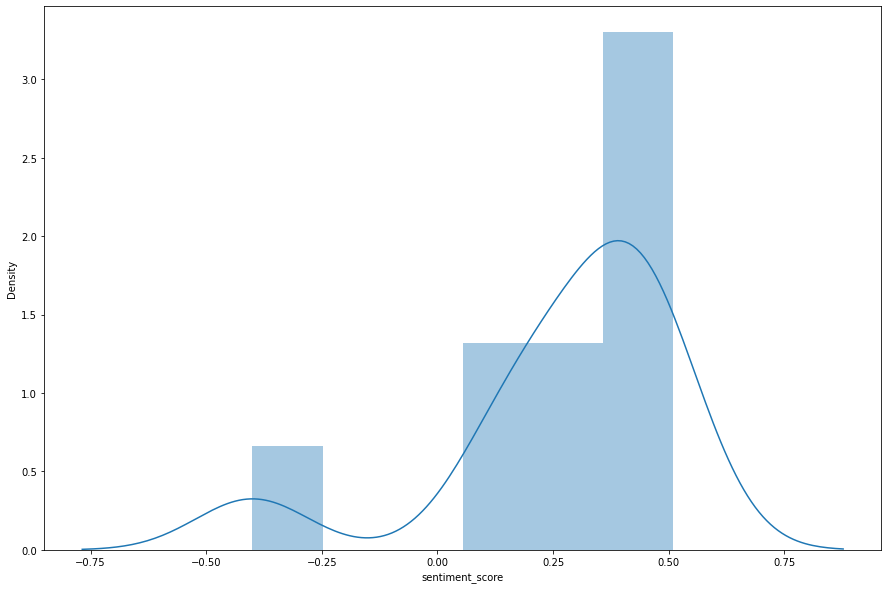

In [67]:
plt.figure(figsize=(15,10))
sns.distplot(RL['sentiment_score'])

**As we can see this distribution plot shows that for large no.of reviews in our dataset we got positive sentiment score, for some reviews we got neutral sentiment and very less reviews contain negative sentiment.**

<Axes: xlabel='index', ylabel='sentiment_score'>

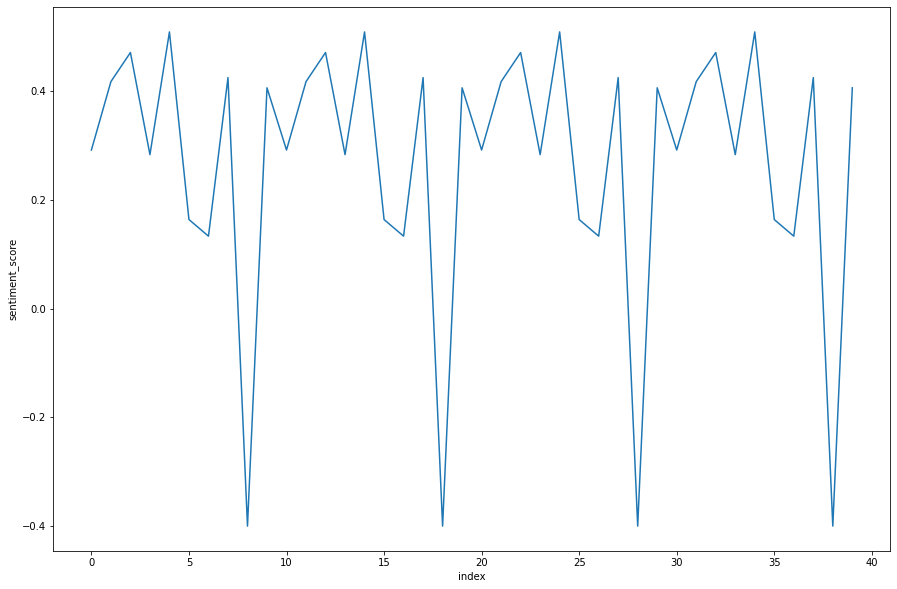

In [68]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_score',x='index',data=RL)

**In this line plot we placed reviews(using index) on X-axis against its sentiment values that we have computed.**

**This plot also shows that:**


**1.   75% of text got sentiment score as positive**

**2.   15% of text got sentiment score as neutral**

**3.   10% of text got sentiment score as negative**

<Axes: title={'center': 'Sent sentiment to sent word count'}, xlabel='word_count', ylabel='sentiment_score'>

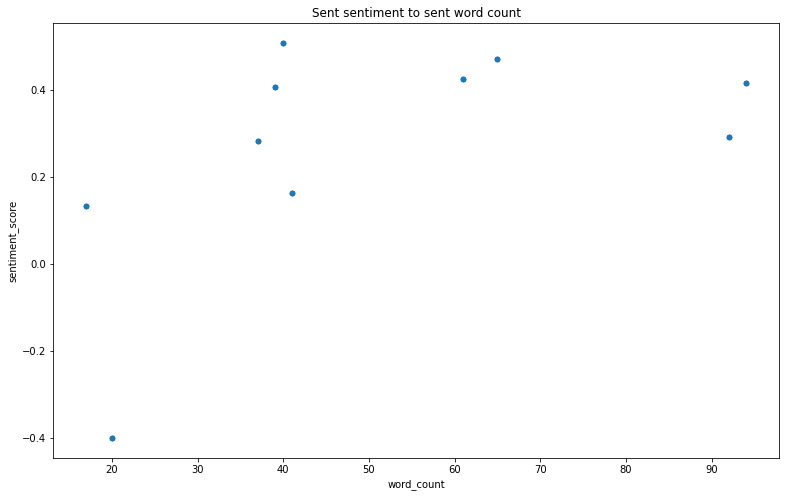

In [69]:
RL.plot.scatter(x='word_count',y='sentiment_score',figsize=(13,8),title='Sent sentiment to sent word count')

**This scatter plot shows how many words are there in the review sentences agianst their sentiment scores.**

In [70]:
# calculating the categories of sentiments and their counts
RL['sentiment'].value_counts()

Neutral     36
Positive     4
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

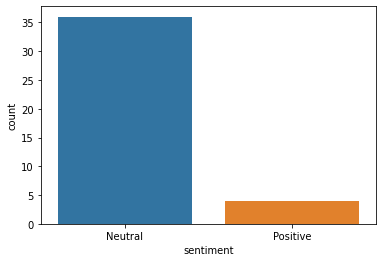

In [71]:
sns.countplot(x=RL['sentiment'])

**In above steps we've performed sentiment analysis without considering affinity scores,which assumes that each positive or negative word contributes equally to the sentiment of the text, regardless of its context or intensity.**


**Now we are goint to perform sentiment analysis by taking affinity scores into account, where it considers the specific emotional value of each word in the text. Words that are strongly positive or strongly negative are assigned higher scores than those that are more neutral.**

# Affinity Score

In [72]:
affin1=pd.read_csv('/content/Afinn.csv',sep=',',encoding='Latin-1')
affin1

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [73]:
affin_scores1=affin1.set_index('word')['value'].to_dict()
affin_scores1

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [74]:
import spacy
nlp1=spacy.load('en_core_web_sm')
sentiment_lexicon=affin_scores1

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp1(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [75]:
calculate_sentiment(text='excite')

3

In [76]:
RL['aff_scr1']=RL['Reviews'].apply(calculate_sentiment)
RL['aff_scr1']

0     16
1     17
2      2
3      8
4     11
5      5
6      3
7     13
8     -3
9     10
10    16
11    17
12     2
13     8
14    11
15     5
16     3
17    13
18    -3
19    10
20    16
21    17
22     2
23     8
24    11
25     5
26     3
27    13
28    -3
29    10
30    16
31    17
32     2
33     8
34    11
35     5
36     3
37    13
38    -3
39    10
Name: aff_scr1, dtype: int64

In [77]:
RL.head()

,index,Reviews,word_count,sentiment_score,sentiment,aff_scr1
0,0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,92,0.291806,Neutral,16
1,1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,94,0.417593,Neutral,17
2,2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
3,3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,37,0.283333,Neutral,8
4,4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,40,0.509062,Positive,11


In [78]:
RL.sort_values(by='aff_scr1')

,index,Reviews,word_count,sentiment_score,sentiment,aff_scr1
38,38,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.400000,Neutral,-3
28,28,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.400000,Neutral,-3
18,18,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.400000,Neutral,-3
8,8,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.400000,Neutral,-3
12,12,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
22,22,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
2,2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
32,32,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
6,6,pov best earbud ive use compar samsung galaxi bud pro much punci base your basehead must go,17,0.133333,Neutral,3
36,36,pov best earbud ive use compar samsung galaxi bud pro much punci base your basehead must go,17,0.133333,Neutral,3


In [79]:
RL['aff_scr1'].describe()

count    40.000000
mean      8.200000
std       6.190149
min      -3.000000
25%       3.000000
50%       9.000000
75%      13.000000
max      17.000000
Name: aff_scr1, dtype: float64

In [80]:
# Negative sentiment
RL[RL['aff_scr1']<=0]

,index,Reviews,word_count,sentiment_score,sentiment,aff_scr1
8,8,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.4,Neutral,-3
18,18,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.4,Neutral,-3
28,28,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.4,Neutral,-3
38,38,use oneplu bud pro airbud left earbud work properli face batteri issu feel oneplu bud pro worthless dont wast money,20,-0.4,Neutral,-3


In [81]:
# Positive sentiment
RL[RL['aff_scr1']>0]

,index,Reviews,word_count,sentiment_score,sentiment,aff_scr1
0,0,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,92,0.291806,Neutral,16
1,1,best purchas electron bought overpow brand without hurdlefeatur support love basswav adjust bass like dual connect support connect devic time ear canal scan featur use ear canal structur optimis sound nois cancel earbud fit quick charg within minut batteri go coupl day respons haptic earbud respons sound vibrat let know press sensor trigger softwar oneplu user easi understand work ui earbud access featur oneplu user use heymelodi applicationverdict budget aroud k increas best audio deliv earbud other k even friend use earbud brand valu around k k also shock impress tri upjust buy want,94,0.417593,Neutral,17
2,2,start use samsung galaxi ultra follow viewspro matt finish cover glossi excel sound qualiti amaz bass excel call qualiti team whatsapp without issu anc mode ok miss oneplu bud pro dual pair time say mobil laptop quick bluetooth connect easi fit ear comfi best part use either bud right ear easili best buy look budget k never think air pod pro believ mecon yet find,65,0.471131,Neutral,2
3,3,media could load bought tw bluetooth long research found worth buy tri realm tw bud one far better devic bass sound qualiti amaz connect quick batteri back nice bought silicon cover bcoz built qualiti great case delic,37,0.283333,Neutral,8
4,4,perfect earbud music lover bass trebl high low perfect anc work awesom per noic cancel noic perfectli spatial audio work one plu remain one plu phone get spatial audio featur get major updatefin best earbud get best experi get earbud,40,0.509062,Positive,11
5,5,awesom experi han zimmer spatial audio exquisit social media influenc tell old bud pro bass better current oneactu like edit blootooth develop option chang blootooth audio codec aac sbc phone customis option hey melodi applic get immens perform experi realli love,41,0.163889,Neutral,5
6,6,pov best earbud ive use compar samsung galaxi bud pro much punci base your basehead must go,17,0.133333,Neutral,3
7,7,wowreal oneplu great job hereveri light weight sometim dont feelthat iam wear budsarbor green colour good matt finishbass top notch especi watch movi netflix hotstar dolbi atmosspati head track soundlot eq option bluetooth function itselfso need bother separ appanc much good compar appl bud samsung budsbut also wont let come anc ambient soundoveral good bud price rangearbor green somehow attract sexi,61,0.425000,Neutral,13
9,9,best purchas sound bass qualiti top notch louderloud louder earbud louder louder superior sound support lhdc codec stream basstrebl mid excel got lot featur like spatial audio hear id customiz nois cancel excel sound customizabilityoveral must buy oneplu phone,39,0.406250,Neutral,10
10,10,oneplu bud pro solid choic true wireless earbudspro sound qualiti impress rich bass clear high activ nois cancel effect make notic differ block extern nois touch control intuit easi use mic decent qualiti batteri life also impress hour listen time singl charg dualdevic connectivitycon howev fit may comfort everyon may experi discomfort prolong use mani oneplu bud pro user claim batteri give one year hope oneplu look issu paus play gestur unrespons notic amount time use tabletconclus overal oneplu bud pro great option look highqual sound effect nois cancel sleek stylish design,92,0.291806,Neutral,16


**Here we are again plotting distribution, line, scatter plots but this time instead of sentiment values we are using affinity score.**

**If we compare these plots with the previous ones we can see changes in the plots.**

<Axes: xlabel='aff_scr1', ylabel='Density'>

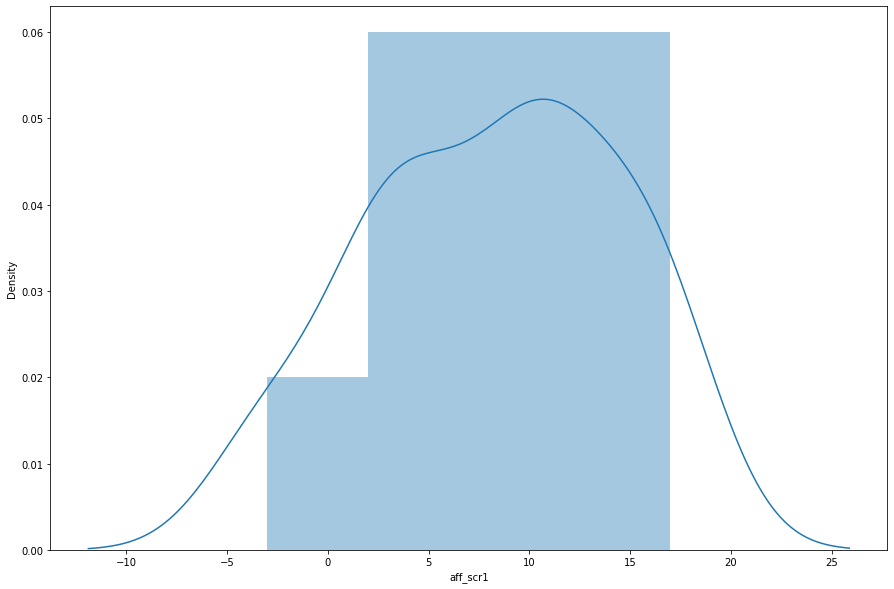

In [82]:
plt.figure(figsize=(15,10))
sns.distplot(RL['aff_scr1'])

<Axes: xlabel='index', ylabel='aff_scr1'>

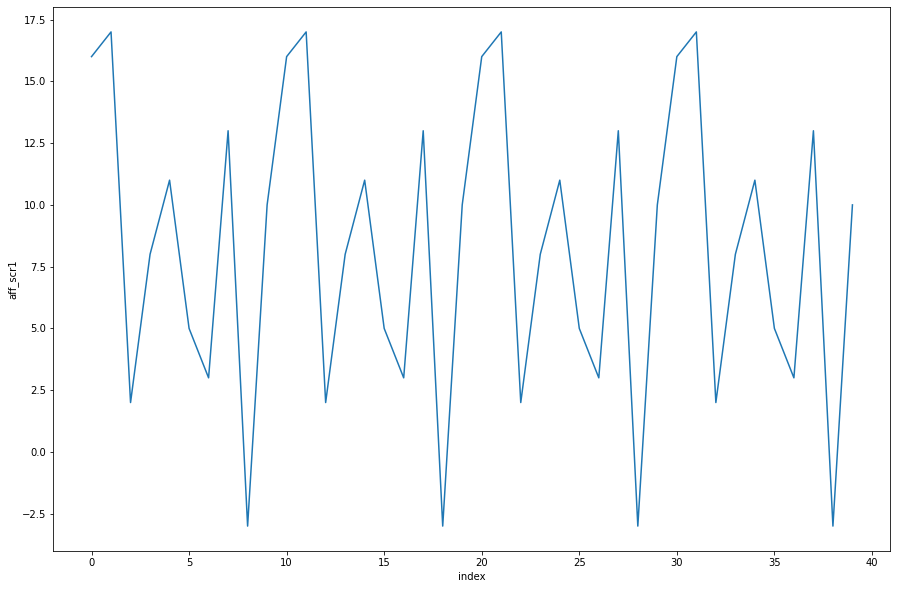

In [83]:
plt.figure(figsize=(15,10))
sns.lineplot(y='aff_scr1',x='index',data=RL)

<Axes: title={'center': 'affine score sent to word count'}, xlabel='word_count', ylabel='aff_scr1'>

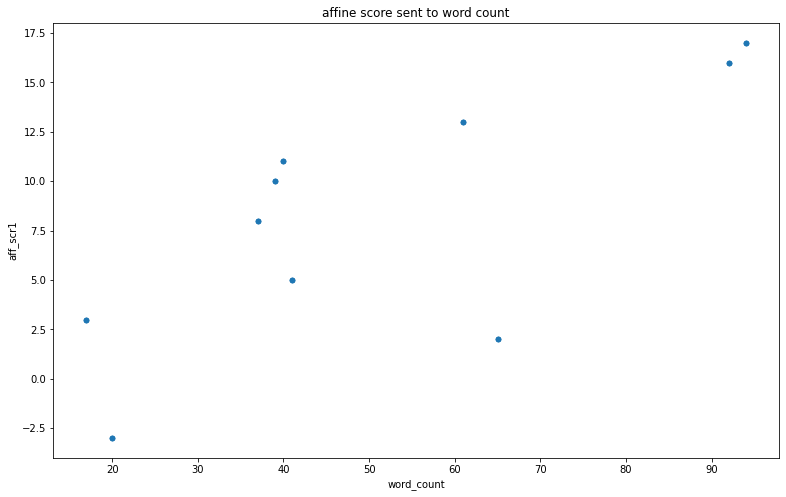

In [84]:
RL.plot.scatter(x='word_count',y='aff_scr1',figsize=(13,8),title='affine score sent to word count')